In [15]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os
import matplotlib.pyplot as plt
import cv2
import sys
import os

In [16]:
dir = "C:/Ai/project/dataset_cut/"

In [17]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_gen = ImageDataGenerator(rescale= 1/255., #0~1사이의 값으로 정규화                                                                                                                   
                               rotation_range=0.2, #random
                               horizontal_flip=True,
                               validation_split = 0.02)

test_gen = ImageDataGenerator(rescale= 1/255.,
                              validation_split = 0.2) #train:test = 8:2

In [19]:
train_data = train_gen.flow_from_directory(dir,
                                           target_size = (180,180),
                                           class_mode = "categorical",
                                           seed = 42,
                                           subset = "training"
                                           )

test_data = test_gen.flow_from_directory(dir,
                                         target_size = (180,180),
                                         class_mode = "categorical",
                                         seed = 42,
                                         subset = "validation"
                                         )

Found 8669 images belonging to 3 classes.
Found 1768 images belonging to 3 classes.


In [20]:
labels = list(train_data.class_indices.keys())

labels

['incorrect_mask', 'with_mask', 'without_mask']

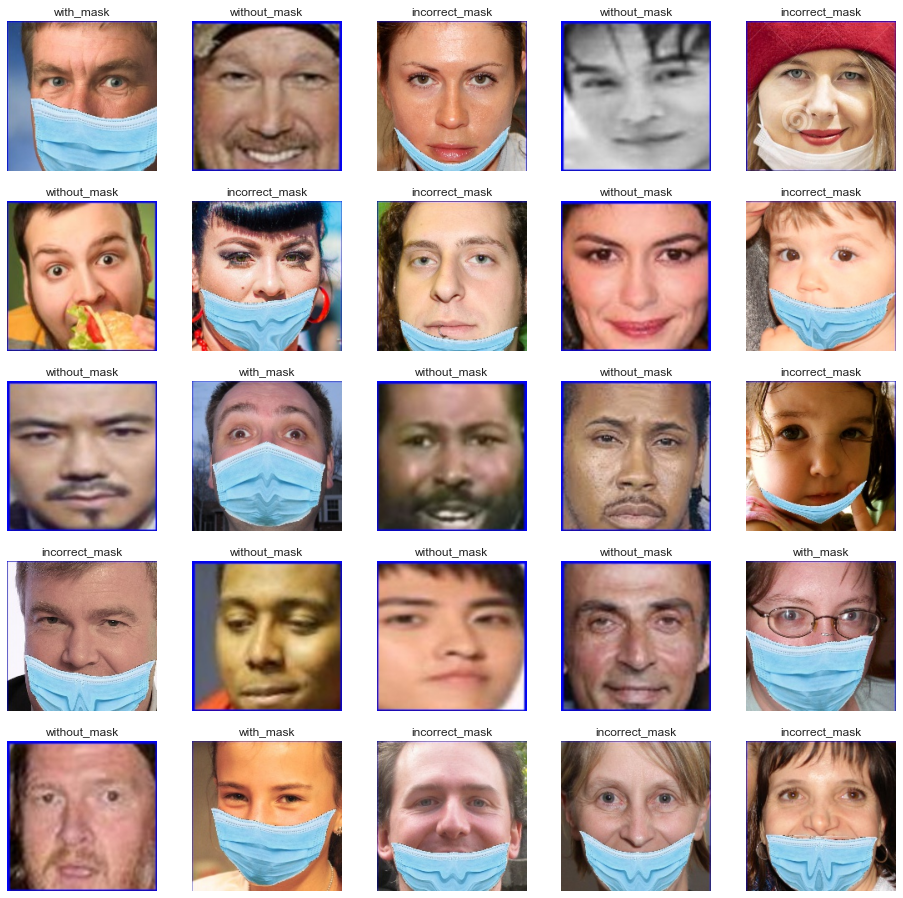

In [7]:
plt.figure(figsize = (16,16))

for i in range(25): #최대 25
    image,label = train_data.next()

    plt.subplot(5,5,i+1)
    plt.imshow(image[i])
    plt.title(labels[tf.argmax(label[i])])
    plt.axis("off")

In [8]:
# Building a CNN model 
import tensorflow as tf
from tensorflow.keras import layers
model  = tf.keras.Sequential([
                              
                              layers.Conv2D(filters= 64, kernel_size= 2, activation="relu", input_shape=(180,180,3)),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Conv2D(filters = 64, kernel_size= 2, activation= "relu"),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Conv2D(filters = 64, kernel_size= 2, activation= "relu"),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Flatten(),

                              layers.Dense(128, activation="relu"),
                              layers.Dropout(0.5),

                              layers.Dense(3, activation= "softmax")
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 179, 179, 64)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 88, 88, 64)        16448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 44, 44, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 43, 43, 64)        16448     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28224)             0

In [10]:
# compiling the model

model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [11]:
# 모델 학습 및 저장.
fit_history = model.fit(train_data,
                        epochs = 30,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        )

Epoch 1/30
271/271 [==============================] - 57s 212ms/step - loss: 0.1989 - accuracy: 0.9422 - val_loss: 0.1329 - val_accuracy: 0.9655
Epoch 2/30
271/271 [==============================] - 58s 213ms/step - loss: 0.1074 - accuracy: 0.9728 - val_loss: 0.1213 - val_accuracy: 0.9678
Epoch 3/30
271/271 [==============================] - 57s 210ms/step - loss: 0.0947 - accuracy: 0.9775 - val_loss: 0.1060 - val_accuracy: 0.9644
Epoch 4/30
271/271 [==============================] - 57s 209ms/step - loss: 0.0808 - accuracy: 0.9782 - val_loss: 0.0809 - val_accuracy: 0.9745
Epoch 5/30
271/271 [==============================] - 56s 208ms/step - loss: 0.0769 - accuracy: 0.9800 - val_loss: 0.0987 - val_accuracy: 0.9621
Epoch 6/30
271/271 [==============================] - 57s 209ms/step - loss: 0.0647 - accuracy: 0.9841 - val_loss: 0.0712 - val_accuracy: 0.9808
Epoch 7/30
271/271 [==============================] - 56s 208ms/step - loss: 0.0618 - accuracy: 0.9839 - val_loss: 0.0592 - val_ac

In [12]:
model_evaluation = model.evaluate(test_data)
print(f"Model Accuracy: {model_evaluation[1] * 100 : 0.2f} %")

56/56 [==============================] - 3s 47ms/step - loss: 0.0157 - accuracy: 0.9960
Model Accuracy:  99.60 %


In [ ]:
# visualizing the test data

import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(16,16))

for i in range(18):
    image, label = test_data.next()

    model_pred = model.predict(image)

    plt.subplot(6,3,i+1)
    plt.imshow(image[i])
    plt.title(f"Prediction: {labels[tf.argmax(model_pred[i])]} \nOriginal : {labels[tf.argmax(label[i])]}")
    plt.subplots_adjust(top= 1.25)
    plt.axis("off")

In [ ]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(fit_history.history['loss'], label='train loss')
plt.plot(fit_history.history['val_loss'], label='validation loss')

plt.legend(loc='best')
plt.show()

In [ ]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(fit_history.history['accuracy'], label='train accuracy')
plt.plot(fit_history.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')
plt.show()

In [13]:
#모델 저장
model.save('project_cut_a100.h5')

In [8]:
#모델 불러오기
import tensorflow as tf
model = tf.keras.models.load_model('project_cut_a100.h5')

### 팀원 사진으로 Test

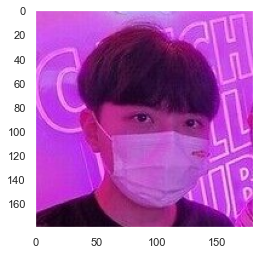

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

test1 = plt.imread('C:/Ai/project/picture/hs_cut.jpg')
plt.grid(False)
plt.imshow(test1);

In [33]:
res = cv2.resize(test1, dsize=(180, 180))
res.shape

(180, 180, 3)

In [34]:
test_face = model.predict_classes(np.array([res]))
test_face

array([1], dtype=int64)

In [36]:
labels[1]

'with_mask'

In [51]:
labels

['incorrect_mask', 'with_mask', 'without_mask']

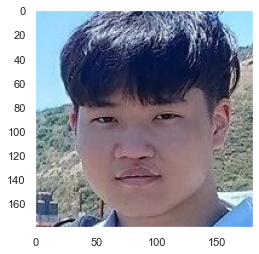

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

test1 = plt.imread('C:/Ai/project/picture/db_cut.jpg')
plt.grid(False)
plt.imshow(test1);

In [38]:
res = cv2.resize(test1, dsize=(180, 180))
res.shape

(180, 180, 3)

In [39]:
test_face = model.predict_classes(np.array([res]))
test_face

array([2], dtype=int64)

In [40]:
labels[2]

'without_mask'

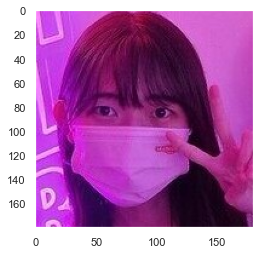

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

test1 = plt.imread('C:/Ai/project/picture/hn_cut.jpg')
plt.grid(False)
plt.imshow(test1);

In [42]:
res = cv2.resize(test1, dsize=(180, 180))
res.shape

(180, 180, 3)

In [43]:
test_face = model.predict_classes(np.array([res]))
test_face

array([1], dtype=int64)

In [45]:
labels[1]

'with_mask'

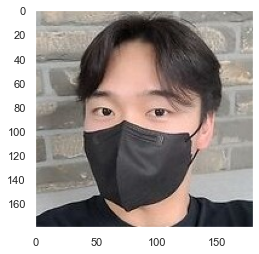

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

test1 = plt.imread('C:/Ai/project/picture/sj_cut.jpg')
plt.grid(False)
plt.imshow(test1);

In [47]:
res = cv2.resize(test1, dsize=(180, 180))
res.shape

(180, 180, 3)

In [48]:
test_face = model.predict_classes(np.array([res]))
test_face

array([1], dtype=int64)

In [50]:
labels[1]

'with_mask'

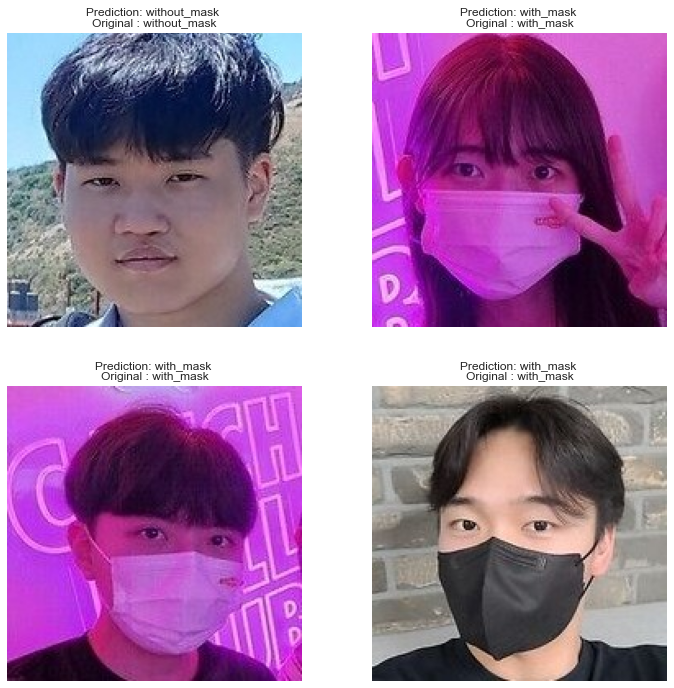

In [57]:
path_dir = "C:/Ai/project/picture_cut/"
dile_list = os.listdir(path_dir)
label_list = [2,1,1,1]

# visualizing the test data

import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(12,8))

for i in range(4):
    image, label = plt.imread(path_dir+dile_list[i]), label_list[i]
    image = cv2.resize(image, dsize=(180, 180))
    model_pred = model.predict(np.array([image]))
    
    plt.subplot(2,2,i+1)
    plt.imshow(image)
    plt.title(f"Prediction: {labels[tf.argmax(model_pred[0])]} \nOriginal : {labels[label]}")
    plt.subplots_adjust(top= 1.25)
    plt.axis("off")

In [56]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(fit_history.history['accuracy'], label='train accuracy')
plt.plot(fit_history.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')
plt.show()